# Read data with a time index

pandas DataFrame objects can have an index denoting time, this recognized by Matplotlib for axis labeling.

This exercise involves reading data from climate_change.csv, containing CO2 levels and temperatures recorded on the 6th of each month from 1958 to 2016, using pandas' read_csv function. The parse_dates and index_col arguments help set a DateTimeIndex.

Don't forget to check out the Matplotlib Cheat Sheet for a quick overview of essential concepts and methods.


* Import the pandas library as pd.
* Read in the data from a CSV file called 'climate_change.csv' using pd.read_csv.
* Use the parse_dates key-word argument to parse the "date" column as dates.
* Use the index_col key-word argument to set the "date" column as the index.

In [4]:
# Import pandas as pd
import pandas as pd

# Read the data from file using read_csv
climate_change = pd.read_csv('/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv', index_col = "date", parse_dates = ["date"])

climate_change.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [6]:
print(climate_change)

             meantemp    humidity  wind_speed  meanpressure
date                                                       
2013-01-01  10.000000   84.500000    0.000000   1015.666667
2013-01-02   7.400000   92.000000    2.980000   1017.800000
2013-01-03   7.166667   87.000000    4.633333   1018.666667
2013-01-04   8.666667   71.333333    1.233333   1017.166667
2013-01-05   6.000000   86.833333    3.700000   1016.500000
...               ...         ...         ...           ...
2016-12-28  17.217391   68.043478    3.547826   1015.565217
2016-12-29  15.238095   87.857143    6.000000   1016.904762
2016-12-30  14.095238   89.666667    6.266667   1017.904762
2016-12-31  15.052632   87.000000    7.325000   1016.100000
2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 4 columns]


# Plot time-series data

To plot time-series data, we use the Axes object plot command. The first argument to this method are the values for the x-axis and the second argument are the values for the y-axis.

This exercise provides data stored in a DataFrame called climate_change. This variable has a time-index with the dates of measurements and two data columns: "co2" and "relative_temp".

In this case, the index of the DataFrame would be used as the x-axis values and we will plot the values stored in the "relative_temp" column as the y-axis values. We will also properly label the x-axis and y-axis.


* Add the data from climate_change to the plot: use the DataFrame index for the x value and the "relative_temp" column for the y values.
* Set the x-axis label to 'Time'.
* Set the y-axis label to 'Relative temperature (Celsius)'.
* Show the figure.

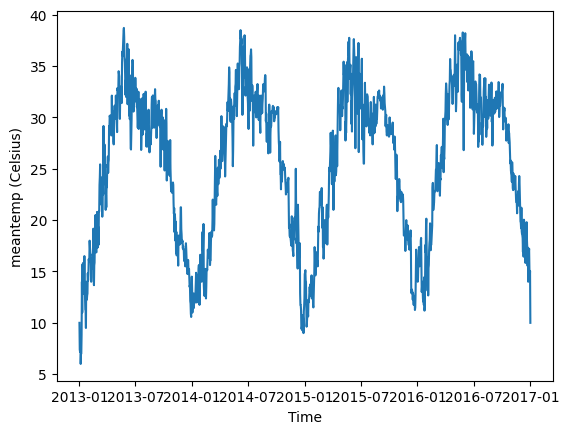

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change["meantemp"])

# Set the x-axis label
ax.set_xlabel("Time")

# Set the y-axis label
ax.set_ylabel("meantemp (Celsius)")
# Show the figure
plt.show()

**Using a time index to zoom in**

When a time-series is represented with a time index, we can use this index for the x-axis when plotting. We can also select a range of dates to zoom in on a particular period within the time-series using pandas' indexing facilities. In this exercise, you will select a portion of a time-series dataset and you will plot that period.

The data to use is stored in a DataFrame called climate_change, which has a time-index with dates of measurements and two data columns: "co2" and "relative_temp".


* Use plt.subplots to create a Figure with one Axes called fig and ax, respectively.
* Create a variable called seventies that includes all the data between "1970-01-01" and "1979-12-31".
* Add the data from seventies to the plot: use the DataFrame index for the x value and the "co2" column for the y values.

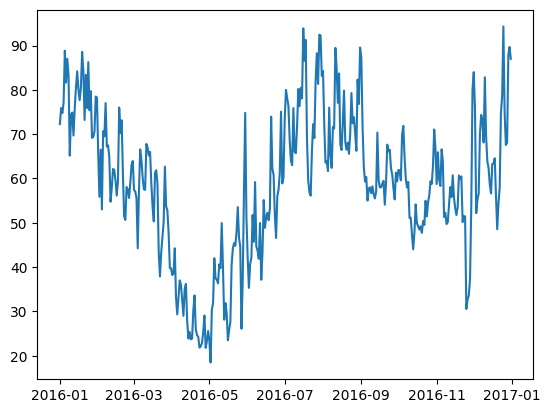

In [9]:
import matplotlib.pyplot as plt

# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
data_2016 = climate_change["2016-01-01" : "2016-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(data_2016.index, data_2016["humidity"])

# Show the figure
plt.show()

# Plotting two variables

If you want to plot two time-series variables that were recorded at the same times, you can add both of them to the same subplot.

If the variables have very different scales, you'll want to make sure that you plot them in different twin Axes objects. These objects can share one axis (for example, the time, or x-axis) while not sharing the other (the y-axis).

To create a twin Axes object that shares the x-axis, we use the twinx method.

In this exercise, you'll have access to a DataFrame that has the climate_change data loaded into it. This DataFrame was loaded with the "date" column set as a DateTimeIndex, and it has a column called "co2" with carbon dioxide measurements and a column called "relative_temp" with temperature measurements.


* Use plt.subplots to create a Figure and Axes objects called fig and ax, respectively.
* Plot the carbon dioxide variable in blue using the Axes plot method.
* Use the Axes twinx method to create a twin Axes that shares the x-axis.
* Plot the relative temperature variable in red on the twin Axes using its plot method.

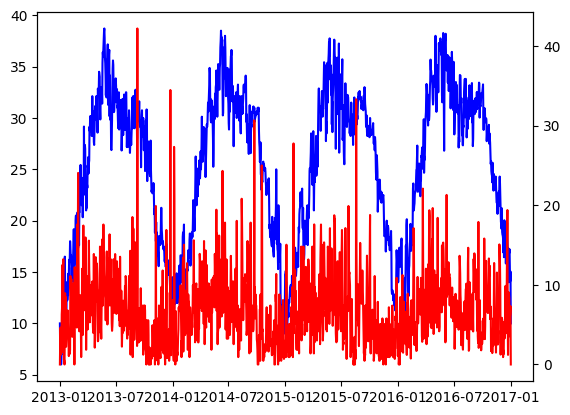

In [13]:
import matplotlib.pyplot as plt

# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change["meantemp"], color="b")

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change["wind_speed"], color="r")

plt.show()

**Defining a function that plots time-series data**

Once you realize that a particular section of code that you have written is useful, it is a good idea to define a function that saves that section of code for you, rather than copying it to other parts of your program where you would like to use this code.

Here, we will define a function that takes inputs such as a time variable and some other variable and plots them as x and y inputs. Then, it sets the labels on the x- and y-axis and sets the colors of the y-axis label, the y-axis ticks and the tick labels.


* Define a function called plot_timeseries that takes as input an Axes object (axes), data (x,y), a string with the name of a color and strings for x- and y-axis labels.
* Plot y as a function of in the color provided as the input color.
* Set the x- and y-axis labels using the provided input xlabel and ylabel, setting the y-axis label color using color.
* Set the y-axis tick parameters using the tick_params method of the Axes object, setting the colors key-word to color.

In [14]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

**Using a plotting function**

Defining functions allows us to reuse the same code without having to repeat all of it. Programmers sometimes say "Don't repeat yourself".

In the previous exercise, you defined a function called plot_timeseries:

plot_timeseries(axes, x, y, color, xlabel, ylabel)
that takes an Axes object (as the argument axes), time-series data (as x and y arguments) the name of a color (as a string, provided as the color argument) and x-axis and y-axis labels (as xlabel and ylabel arguments). In this exercise, the function plot_timeseries is already defined and provided to you.

Use this function to plot the climate_change time-series data, provided as a pandas DataFrame object that has a DateTimeIndex with the dates of the measurements and co2 and relative_temp columns.

* In the provided ax object, use the function plot_timeseries to plot the "co2" column in blue, with the x-axis label "Time (years)" and y-axis label "CO2 levels".
* Use the ax.twinx method to add an Axes object to the figure that shares the x-axis with ax.
* Use the function plot_timeseries to add the data in the "relative_temp" column in red to the twin Axes object, with the x-axis label "Time (years)" and y-axis label "Relative temperature (Celsius)".

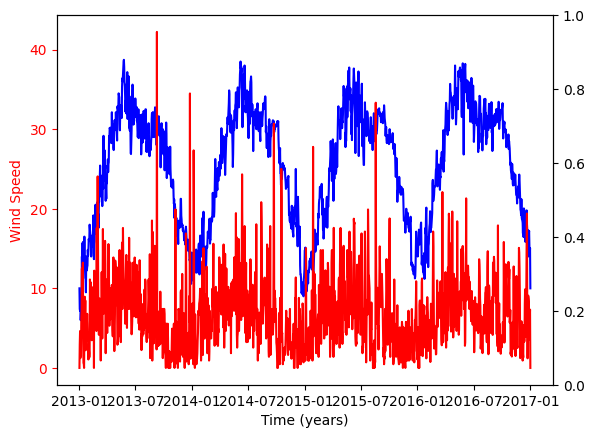

In [16]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["meantemp"], "blue", "Time (years)", "Mean Tempreature")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax, climate_change.index, climate_change["wind_speed"],"red", "Time (years)", "Wind Speed")

plt.show()

# Annotating a plot of time-series data

Annotating a plot allows us to highlight interesting information in the plot. For example, in describing the climate change dataset, we might want to point to the date at which the relative temperature first exceeded 1 degree Celsius.

For this, we will use the annotate method of the Axes object. In this exercise, you will have the DataFrame called climate_change loaded into memory. Using the Axes methods, plot only the relative temperature column as a function of dates, and annotate the data.


* Use the ax.plot method to plot the DataFrame index against the relative_temp column.
* Use the annotate method to add the text '>1 degree' in the location (pd.Timestamp('2015-10-06'), 1).

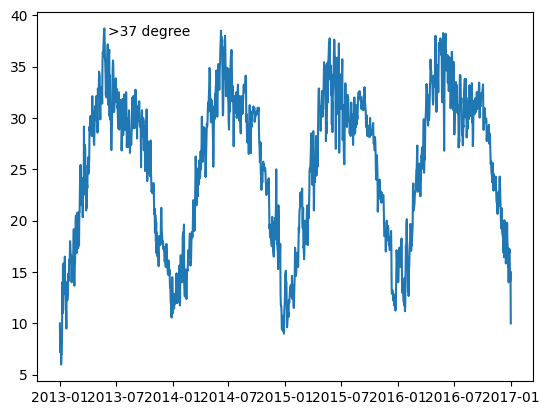

In [21]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change['meantemp'] )

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate(">37 degree", xy = (pd.Timestamp('2013-06-06'), 38))

plt.show()

**Plotting time-series: putting it all together**

In this exercise, you will plot two time-series with different scales on the same Axes, and annotate the data from one of these series.

The CO2/temperatures data is provided as a DataFrame called climate_change. You should also use the function that we have defined before, called plot_timeseries, which takes an Axes object (as the axes argument) plots a time-series (provided as x and y arguments), sets the labels for the x-axis and y-axis and sets the color for the data, and for the y tick/axis labels:

1. plot_timeseries(axes, x, y, color, xlabel, ylabel)

Then, you will annotate with text an important time-point in the data: on 2015-10-06, when the temperature first rose to above 1 degree over the average.

* Use the plot_timeseries function to plot CO2 levels against time. Set xlabel to "Time (years)" ylabel to "CO2 levels" and color to 'blue'.
* Create ax2, as a twin of the first Axes.
* In ax2, plot temperature against time, setting the color ylabel to "Relative temp (Celsius)" and color to 'red'.
* Annotate the data using the ax2.annotate method. Place the text ">1 degree" in x=pd.Timestamp('2008-10-06'), y=-0.2 pointing with a gray thin arrow to x=pd.Timestamp('2015-10-06'), y = 1.

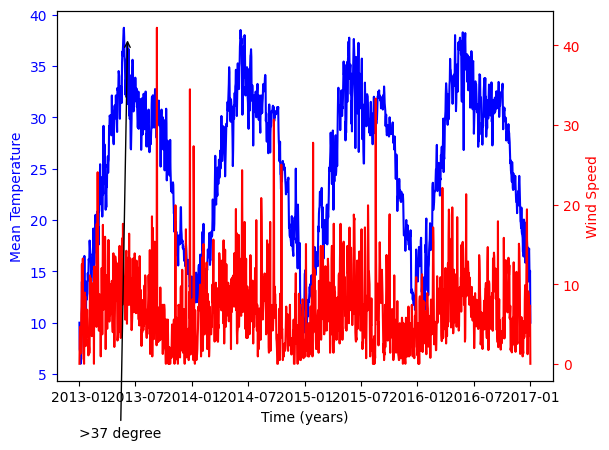

In [37]:
fig, ax = plt.subplots()

# Plot the mean temperature time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["meantemp"],  'blue', "Time (years)", "Mean Temperature")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the wind speed data in red on ax2
plot_timeseries(ax2, climate_change.index, climate_change["wind_speed"], 'red', "Time (years)", "Wind Speed")

# Annotate the point with wind speed > 37 (assuming that was the intention)
ax2.annotate(">37 degree", xy=(pd.Timestamp('2013-06-06'), 41), 
             xytext=(pd.Timestamp('2013-01-01'), -9.2),  # Provide both x and y for xytext
             arrowprops={'arrowstyle':'->', 'color':'black'})

plt.show()
